# Data Anlysis


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Visulaizing first image and cheking the values
Note that here we are uploading one picture

<class 'numpy.ndarray'>
uint8
(720, 1280, 3)
0 255


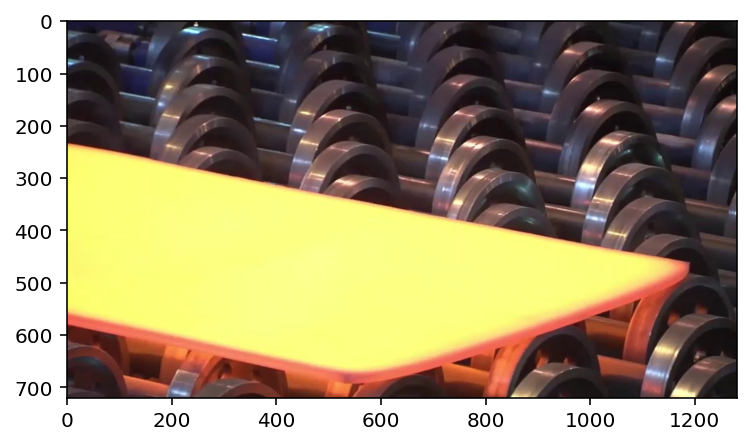

In [2]:
from skimage import io
import matplotlib.pyplot as plt

image_hot = io.imread('../hotplate_images/hot_1.jpg')

print(type(image_hot))
print(image_hot.dtype)
print(image_hot.shape)
print(image_hot.min(), image_hot.max())

plt.imshow(image_hot);


## here we are uploading all the images in the subfolder


In [72]:
ic = io.ImageCollection('../hotplate_images/*.jpg')

print('Type:', type(ic))

ic.files
ic[1]


Type: <class 'skimage.io.collection.ImageCollection'>


array([[[25, 22, 49],
        [25, 22, 49],
        [25, 22, 49],
        ...,
        [33, 32, 30],
        [32, 31, 29],
        [33, 32, 30]],

       [[25, 22, 49],
        [25, 22, 49],
        [25, 22, 49],
        ...,
        [32, 31, 29],
        [32, 31, 29],
        [33, 32, 30]],

       [[25, 22, 49],
        [25, 22, 49],
        [25, 22, 49],
        ...,
        [32, 31, 29],
        [32, 31, 29],
        [32, 31, 29]],

       ...,

       [[56, 45, 49],
        [56, 45, 49],
        [56, 45, 49],
        ...,
        [23, 22, 20],
        [23, 22, 20],
        [23, 22, 20]],

       [[54, 43, 47],
        [54, 43, 47],
        [54, 43, 47],
        ...,
        [23, 22, 20],
        [23, 22, 20],
        [23, 22, 20]],

       [[54, 43, 47],
        [54, 43, 47],
        [54, 43, 47],
        ...,
        [23, 22, 20],
        [23, 22, 20],
        [23, 22, 20]]], dtype=uint8)

In [3]:
import os

f, axes = plt.subplots(nrows=19, ncols=len(ic) // 19 + 1, figsize=(20, 10))

# subplots returns the figure and an array of axes
# we use `axes.ravel()` to turn these into a list
axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

NameError: name 'ic' is not defined

In [74]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.data as data
import skimage.segmentation as seg
from skimage import filters
from skimage import draw
from skimage import color
from skimage import exposure


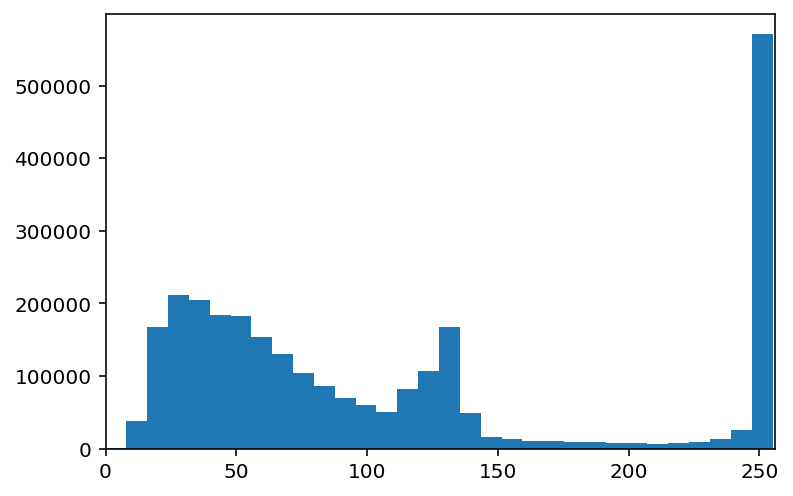

In [75]:
fig, ax = plt.subplots(1, 1)

ax.hist(image_hot.ravel(), bins=32, range=[0, 255])
ax.set_xlim(0, 256);

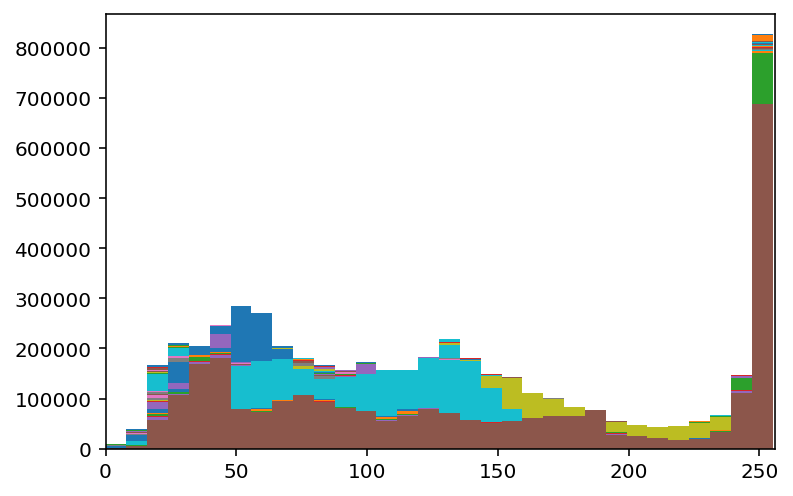

In [76]:
fig, ax = plt.subplots(1, 1)
for i, image in enumerate(ic):
    ax.hist(image.ravel(), bins=32, range=[0, 255])
    ax.set_xlim(0, 256);
    

Text(0.5, 1.0, 'image tresholded')

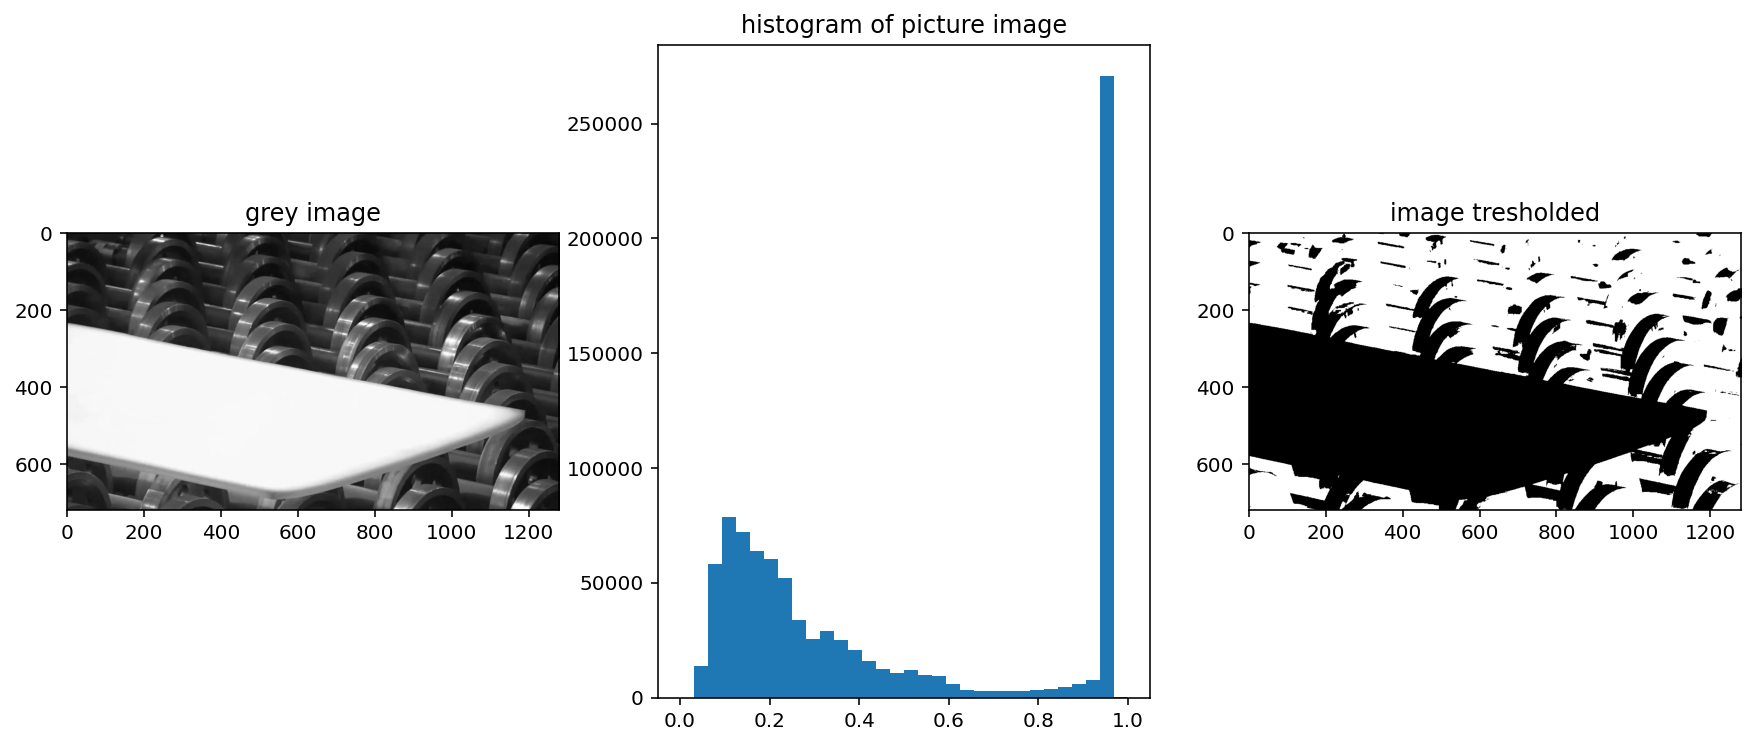

In [77]:
from skimage.color import rgb2gray

fig, ax = plt.subplots(1, 3, figsize=(15,6))
(ax_grey, ax_hist, ax_seg) = ax

gray_hot = rgb2gray(image_hot)
image_segmented = gray_hot < 0.3


ax_hist.hist(gray_hot.ravel(), bins = 32, range=[0,1])
ax_hist.set_title('histogram of picture image')
ax_grey.imshow(gray_hot, cmap='gray')
ax_grey.set_title('grey image')

ax_seg.imshow(image_segmented, cmap='gray')
ax_seg.set_title('image tresholded')


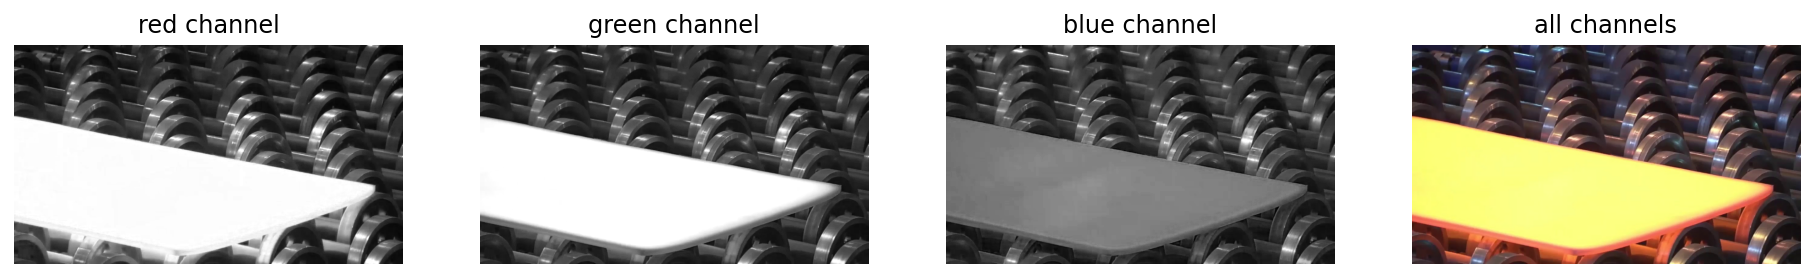

In [78]:
# --- assign each color channel to a different variable ---

r = image_hot[:, :, 0]
g = image_hot[:, :, 1]
b = image_hot[:, :, 2]

# --- display the image and r, g, b channels ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
# axis represent the direction in whoch we want to stack togheter the images
ax_color.imshow(image_hot)
ax_color.set_title('all channels');

In [79]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte

## bisogna lavorare su immagini in bianco e nero, quindi prendiamo sempre in considerazione gray_hot

Define a function to present the results (as images) in the same line.
Then we will start with performing morphological operations:
1. Erosion which means  sets a pixel at (i, j) to the minimum over all pixels in the neighborhood centered at (i, j).
2. Dilatation sets a pixel at (i, j) to the maximum over all pixels in the neighborhood centered at (i, j).
3. Opening on an image is defined as an erosion followed by a dilation. It can remove small bright spots and connect dark craks
4. Closing, is the inverse; dilatation followed by erosion. It removes dark spots and connect bright areas


In [80]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

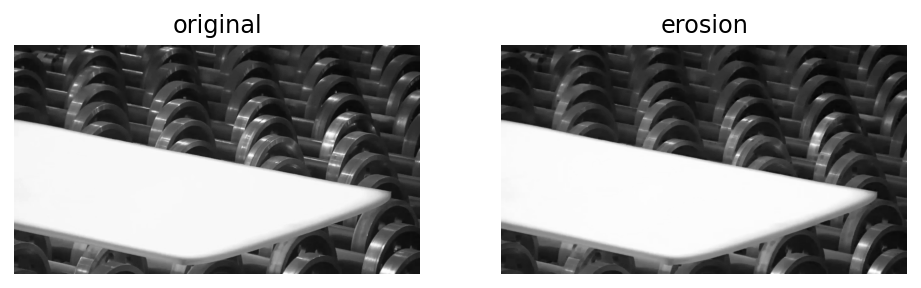

In [81]:
from skimage.morphology import (erosion, dilation, opening, closing)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image  # noqa
from skimage.morphology import disk, rectangle  # noqa

footprint = rectangle(4, 6)
eroded = erosion(gray_hot, footprint)
plot_comparison(gray_hot, eroded, 'erosion')

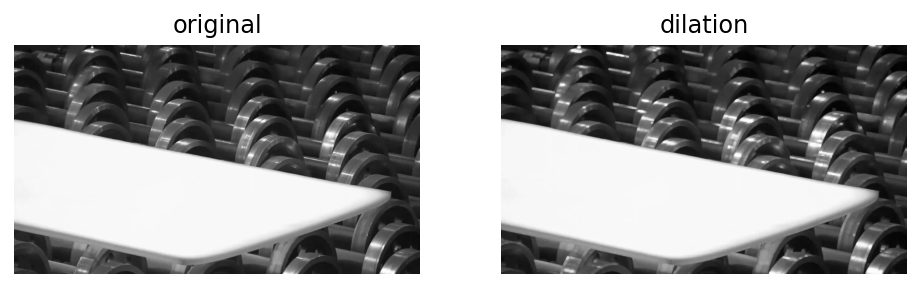

In [82]:
dilated = dilation(gray_hot, footprint)
plot_comparison(gray_hot, dilated, 'dilation')

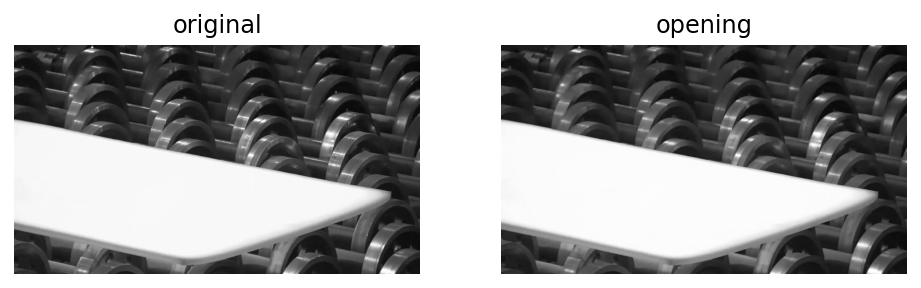

In [83]:
opened = opening(gray_hot, footprint)
plot_comparison(gray_hot, opened, 'opening')

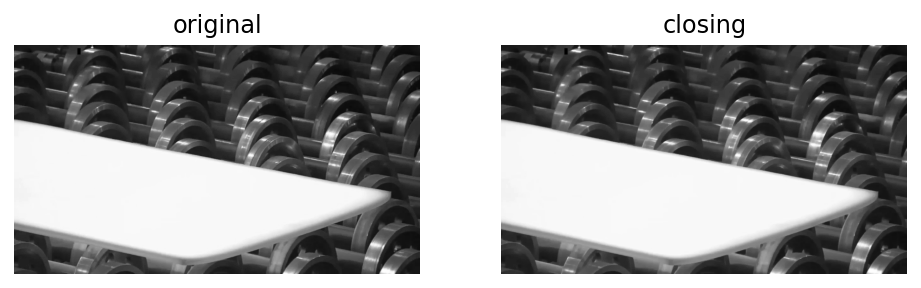

In [84]:
phantom = gray_hot.copy()
phantom[10:30, 200:210] = 0

closed = closing(phantom, footprint)
plot_comparison(phantom, closed, 'closing')

### doing the same on the segmented image



(-0.5, 1279.5, 719.5, -0.5)

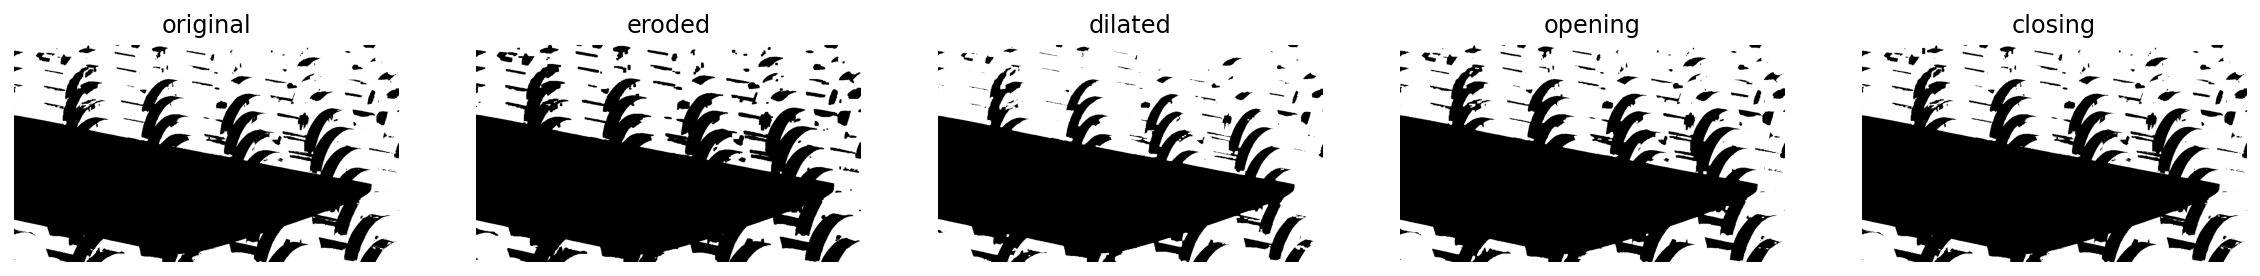

In [85]:
footprint = rectangle(4, 6)
eroded = erosion(image_segmented, footprint)
dilated = dilation(image_segmented, footprint)
opened = opening(image_segmented, footprint)
phantom = image_segmented.copy()
phantom[10:30, 200:210] = 0

closed = closing(phantom, footprint)

f, (a0, a1, a2, a3, a4) = plt.subplots(ncols=5, figsize=(20, 12), sharex=True,
                                   sharey=True)
a0.imshow(image_segmented, cmap=plt.cm.gray)
a0.set_title('original')
a0.axis('off')

a1.imshow(eroded, cmap=plt.cm.gray)
a1.set_title('eroded')
a1.axis('off')

a2.imshow(dilated, cmap=plt.cm.gray)
a2.set_title('dilated')
a2.axis('off')

a3.imshow(opened, cmap=plt.cm.gray)
a3.set_title('opening')
a3.axis('off')

a4.imshow(phantom, cmap=plt.cm.gray)
a4.set_title('closing')
a4.axis('off')

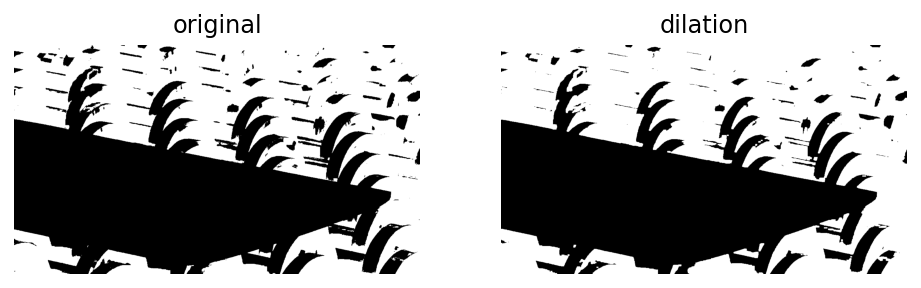

In [86]:
dilated = dilation(image_segmented, footprint)
plot_comparison(image_segmented, dilated, 'dilation')

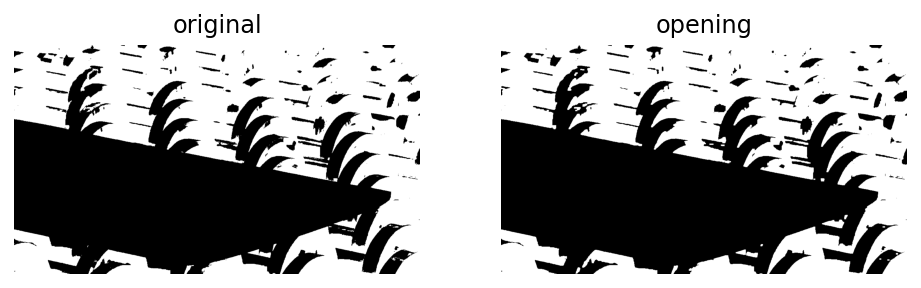

In [87]:
opened = opening(image_segmented, footprint)
plot_comparison(image_segmented, opened, 'opening')

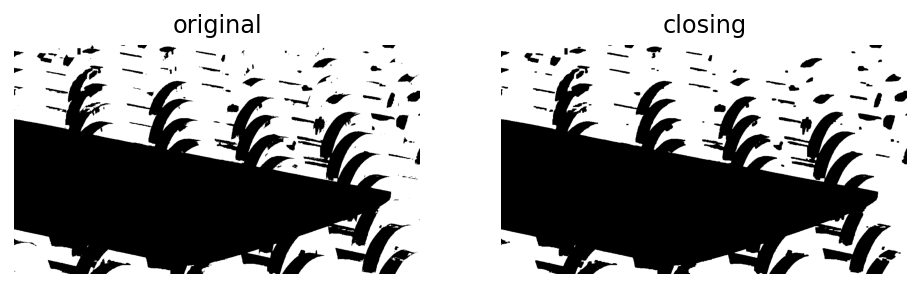

In [88]:
phantom = image_segmented.copy()
phantom[10:30, 200:210] = 0

closed = closing(phantom, footprint)
plot_comparison(phantom, closed, 'closing')

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


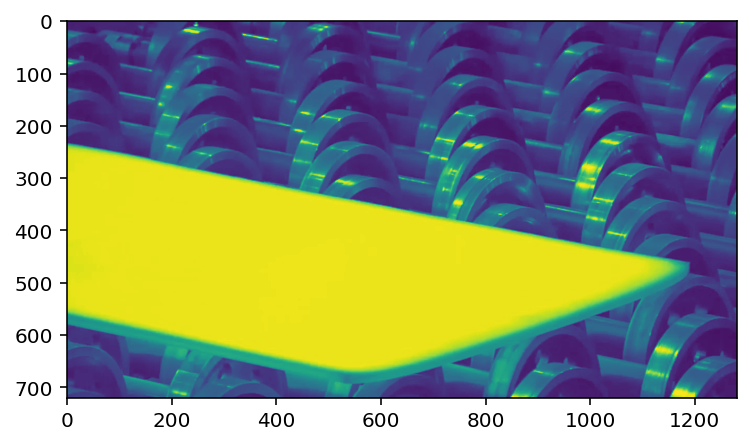

In [89]:
import cv2 as cv
from math import atan2, cos, sin, sqrt, pi
import numpy as np
 
def drawAxis(img, p_, q_, color, scale):
  p = list(p_)
  q = list(q_)
 
  ## [visualization1]
  angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians
  hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))
 
  # Here we lengthen the arrow by a factor of scale
  q[0] = p[0] - scale * hypotenuse * cos(angle)
  q[1] = p[1] - scale * hypotenuse * sin(angle)
  cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv.LINE_AA)
 
  # create the arrow hooks
  p[0] = q[0] + 9 * cos(angle + pi / 4)
  p[1] = q[1] + 9 * sin(angle + pi / 4)
  cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv.LINE_AA)
 
  p[0] = q[0] + 9 * cos(angle - pi / 4)
  p[1] = q[1] + 9 * sin(angle - pi / 4)
  cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv.LINE_AA)
  ## [visualization1]
 
def getOrientation(pts, img):
  ## [pca]
  # Construct a buffer used by the pca analysis
  sz = len(pts)
  data_pts = np.empty((sz, 2), dtype=np.float64)
  for i in range(data_pts.shape[0]):
    data_pts[i,0] = pts[i,0,0]
    data_pts[i,1] = pts[i,0,1]
 
  # Perform PCA analysis
  mean = np.empty((0))
  mean, eigenvectors, eigenvalues = cv.PCACompute2(data_pts, mean)
 
  # Store the center of the object
  cntr = (int(mean[0,0]), int(mean[0,1]))
  ## [pca]
 
  ## [visualization]
  # Draw the principal components
  cv.circle(img, cntr, 3, (255, 0, 255), 2)
  p1 = (cntr[0] + 0.02 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 0.02 * eigenvectors[0,1] * eigenvalues[0,0])
  p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1,0])
  drawAxis(img, cntr, p1, (255, 255, 0), 1)
  drawAxis(img, cntr, p2, (0, 0, 255), 5)
 
  angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians
  ## [visualization]
 
  # Label with the rotation angle
  label = "  Rotation Angle: " + str(-int(np.rad2deg(angle)) - 90) + " degrees"
  textbox = cv.rectangle(img, (cntr[0], cntr[1]-25), (cntr[0] + 250, cntr[1] + 10), (255,255,255), -1)
  cv.putText(img, label, (cntr[0], cntr[1]), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv.LINE_AA)
 
  return angle
 
# Load the image
img = gray_hot
 
# Was the image there?
if img is None:
  print("Error: File not found")
  exit(0)
 
plt.imshow(img)
 
# Convert image to binary
#_, bw = cv.threshold(image_segmented, 10, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
 
# Find all the contours in the thresholded image
contours, _ = cv.findContours(image_segmented/255, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
 
for i, c in enumerate(contours):
 
  # Calculate the area of each contour
  area = cv.contourArea(c)
 
  # Ignore contours that are too small or too large
  if area < 3700 or 100000 < area:
    continue
 
  # Draw each contour only for visualisation purposes
  cv.drawContours(img, contours, i, (0, 0, 255), 2)
 
  # Find the orientation of each shape
  getOrientation(c, img)
 
cv.imshow('Output Image', img)
cv.waitKey(0)
cv.destroyAllWindows()
  
# Save the output image to the current directory
cv.imwrite("output_img.jpg", img)

In [91]:
#Import required modules
from sklearn.decomposition import PCA
 
pca = PCA(2) # we need 2 principal components.
converted_data = pca.fit_transform(image_segmented.data)
 
converted_data.shape

(720, 2)

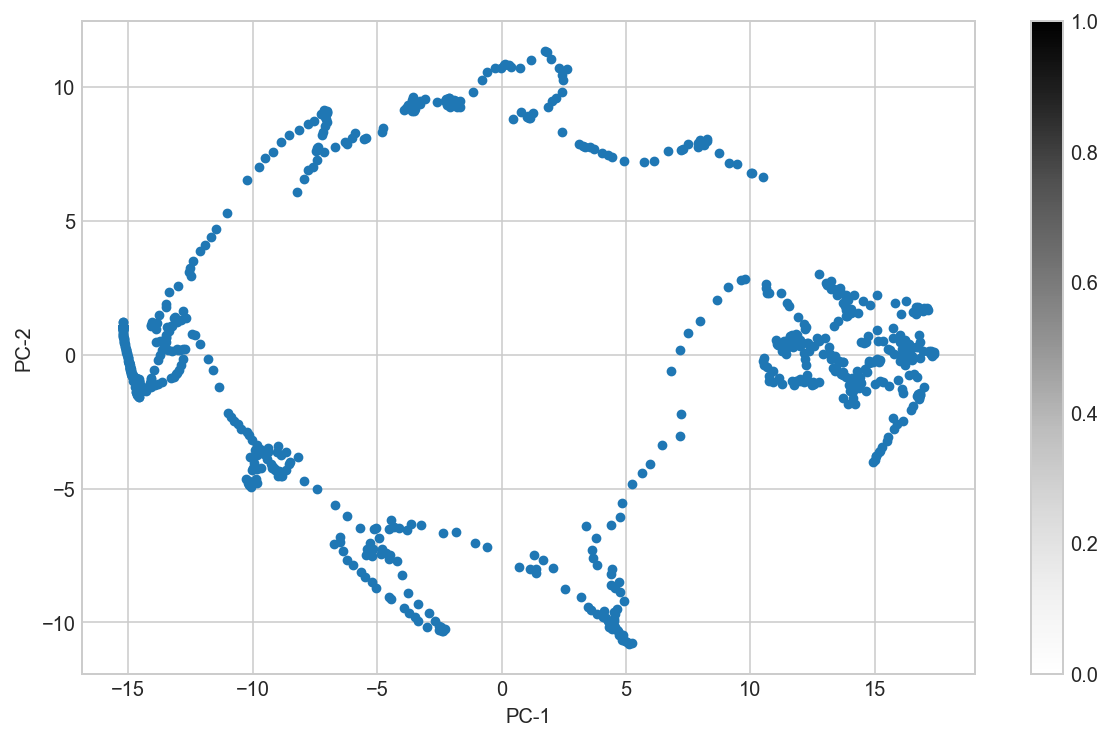

In [93]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map )
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()


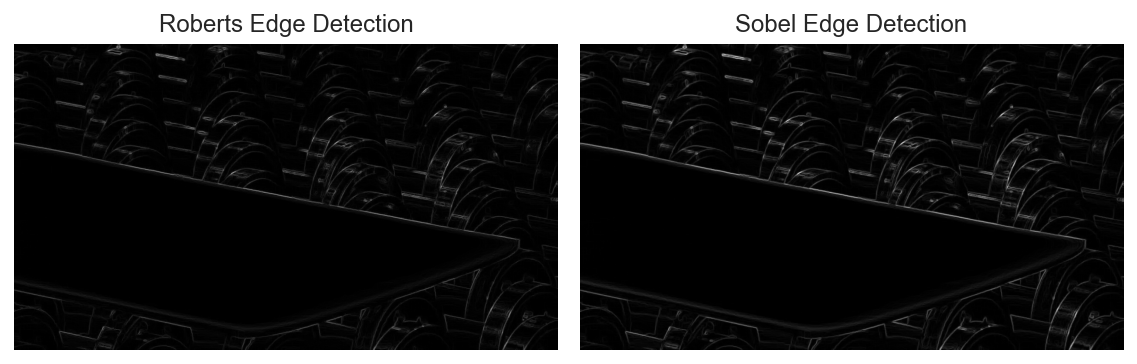

In [96]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.data import camera
from skimage.util import compare_images


image = gray_hot
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


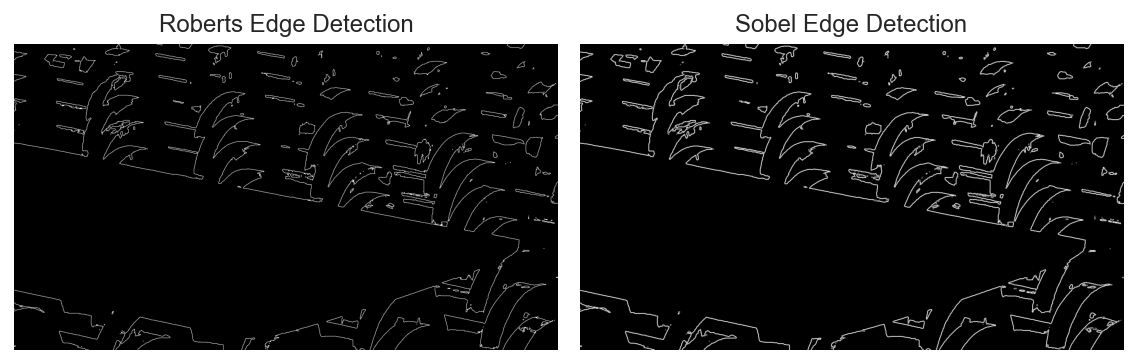

In [97]:
image = image_segmented
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [123]:
import numpy as np
# to compute angles
from math import atan2, cos, sin, sqrt, pi

import cv2

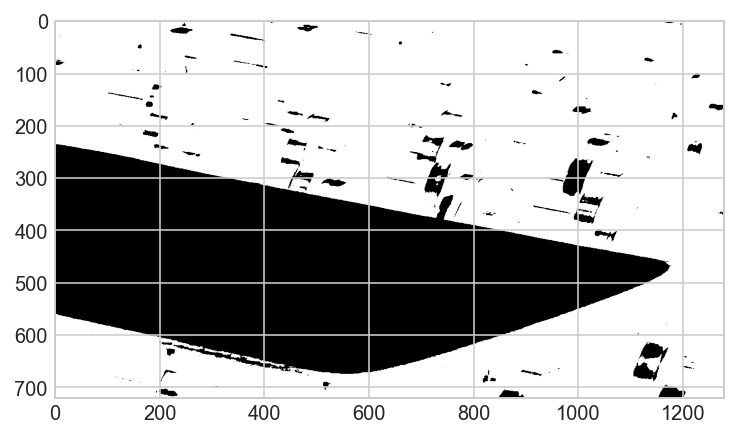

In [102]:
# convert to grayscale
gray = cv2.cvtColor(image_hot, cv2.COLOR_BGR2GRAY)
# convert img into binary
_, bw = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# calculating Contours
contours, _ = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

plt.imshow(bw)

In [103]:
def get_orientation(pts, img):
    sz = len(pts)
    data_pts = np.empty((sz, 2), dtype=np.float64)
    for i in range(data_pts.shape[0]):
        data_pts[i,0] = pts[i,0,0]
        data_pts[i,1] = pts[i,0,1]
    # Perform PCA analysis
    mean = np.empty((0))
    mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean)
    # Store the center of the object
    cntr = (int(mean[0,0]), int(mean[0,1]))
    cv2.circle(img, cntr, 3, (255, 0, 255), 2)
    p1 = (cntr[0] + 0.02 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 0.02 *  eigenvectors[0,1] * eigenvalues[0,0])
    p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1,0])
    draw_axis(img, cntr, p1, (0, 150, 0), 1)
    draw_axis(img, cntr, p2, (200, 150, 0), 5)
    angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians
    return angle

In [104]:
def draw_axis(img, p_, q_, colour, scale):
    p = list(p_)
    q = list(q_)
    angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians
    hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))
    # Here we lengthen the arrow by a factor of scale
    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)
    # create the arrow hooks
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)
    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)

In [129]:
for i,c in enumerate(contours):
  # area of each contour
  area = cv2.contourArea(c)
  # ignore contour which is too small or large
  if area < 1e2 or 1e5 < area:
    continue
  # draw each contour only for visualization
  cv2.drawContours(image_hot, contours, i, (0, 0, 255), 2)
  # find orientation of each shape
  get_orientation(c,bw)
    
print(get_orientation(c,image_hot))
print(cv2.imshow('output', image_hot))

-0.3084899986995644
None
